# 집돌이 vs 밖돌이

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [3]:
path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

Hancom Gothic


In [4]:
# 그래프 스타일
plt.style.use('ggplot')

In [5]:
# load data
with open(r'C:\Users\soug9\Desktop\Shcard Summer School\data\survey17-27+zipdol.txt',"rb") as fp :
        survey = pickle.load(fp)  

In [6]:
len(survey)

445

In [7]:
survey.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
0,Z0824235141ST,M,3,6,5,3,1,4,2,1.0,NaN,NaN,NaN,NaN,2,1,1,0
1,Z7134211171ST,M,1,5,5,5,5,3,1,NaN,NaN,3.0,NaN,NaN,5,5,1,0
2,Z9423260421ST,M,1,6,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,5,2,3,0
3,Z6814255701ST,M,1,1,2,2,1,1,1,NaN,NaN,NaN,4.0,NaN,1,1,4,1
4,Z2924230251ST,F,3,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,10,2


* 응답에 일관성이 없는 응답자 삭제

In [10]:
video2 = survey[(survey['Q20'] != 1) & (survey['Q21'] != 1) & (survey['Q22'] != 1) & (survey['Q23'] != '1')]
video1 = survey[(survey['Q20'] == 1) & (survey['Q21'] == 1) & (survey['Q22'] == 1) & (survey['Q23'] == '1')]

video = pd.concat([video1, video2])

In [11]:
len(video)

318

In [12]:
video.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
2,Z9423260421ST,M,1,6,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,5,2,3,0
4,Z2924230251ST,F,3,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,10,2
8,Z5624247791ST,M,2,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,5,1
11,Z7714290061ST,M,1,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,2,0
14,Z9704236101ST,F,3,3,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,6,1


* 집돌이

In [13]:
zipdol = video[video['zipdol'] == 2]

In [14]:
len(zipdol)

95

In [15]:
zipdol.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
4,Z2924230251ST,F,3,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,10,2
21,Z1634265931ST,F,3,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
25,Z0544232431ST,F,4,2,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,8,2
34,Z8724220501ST,F,1,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
49,Z8724252841ST,F,3,3,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,8,2


* 밖돌이

In [16]:
nozipdol = video[video['zipdol'] == 0]

In [17]:
len(nozipdol)

71

In [18]:
nozipdol.head()

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
2,Z9423260421ST,M,1,6,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,5,2,3,0
11,Z7714290061ST,M,1,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,2,0
53,Z3644273551ST,F,1,1,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,2,0
62,Z8833267411ST,F,1,3,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,2,0
73,Z3644235191ST,M,3,2,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,5,6(재밌어서),3,0


## 집돌이들은 동영상 스트리밍 서비스를 밖돌이보다 더 자주 이용할까? 

### (설문 Q20) 인터넷 동영상 스트리밍 서비스(넷플릭스, 유튜브 레드, 왓챠 플레이 등)에 대한 연간 이용 횟수는 얼마입니까?

* 집돌이

In [20]:
num, count_zip = np.unique(zipdol['Q20'], return_counts=True)

In [21]:
num, count_zip

(array([1, 2, 3, 4, 5], dtype=int64), array([40, 16,  4,  3, 32], dtype=int64))

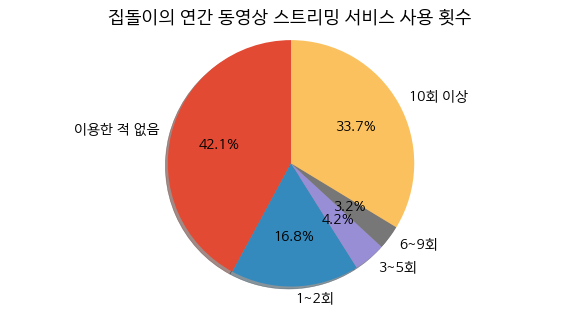

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['이용한 적 없음', '1~2회', '3~5회', '6~9회', '10회 이상']
sizes = count_zip

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('집돌이의 연간 동영상 스트리밍 서비스 사용 횟수', fontsize=18)

plt.show()

* 밖돌이

In [23]:
num_nozip, count_nozip = np.unique(nozipdol['Q20'], return_counts=True)

In [24]:
num_nozip, count_nozip

(array([1, 2, 3, 4, 5], dtype=int64), array([35, 11,  6,  2, 17], dtype=int64))

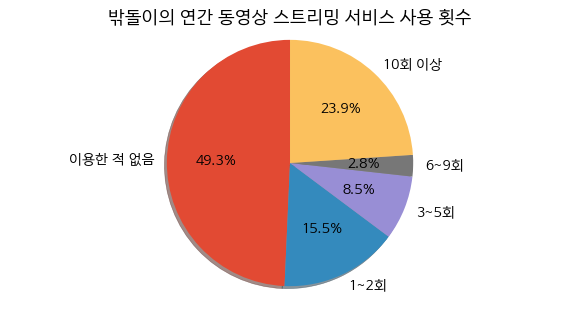

In [25]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['이용한 적 없음', '1~2회', '3~5회', '6~9회', '10회 이상']
sizes = count_nozip

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('밖돌이의 연간 동영상 스트리밍 서비스 사용 횟수', fontsize=18)

plt.show()

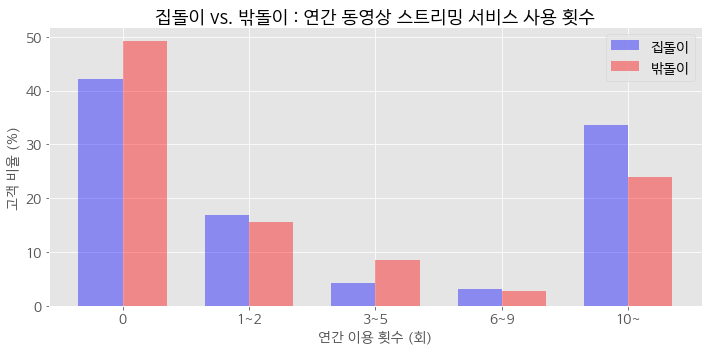

In [26]:
n_groups = 5

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, count_zip/sum(count_zip)*100, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='집돌이')

rects2 = ax.bar(index + bar_width, count_nozip/sum(count_nozip)*100, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='밖돌이')

ax.set_xlabel('연간 이용 횟수 (회)', fontsize=14)
ax.set_ylabel('고객 비율 (%)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 연간 동영상 스트리밍 서비스 사용 횟수', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['0', '1~2', '3~5', '6~9', '10~'], fontsize=14)
ax.set_yticks(range(0,60,10))
ax.set_yticklabels(range(0,60,10), fontsize=14)
ax.legend(fontsize=14)

 
fig.tight_layout()
plt.show()

## 집돌이들은 밖돌이보다 동영상 스트리밍 서비스 이용시간이 길까? 

### (설문 Q21) 인터넷 동영상 스트리밍 서비스(넷플릭스, 유튜브 레드, 왓챠 플레이 등)에 대한 1일 평균 이용 시간은 얼마입니까?

* 집돌이

In [27]:
num, count_zip21 = np.unique(zipdol['Q21'], return_counts=True)

In [28]:
num, count_zip21

(array([1, 2, 3, 4, 5], dtype=int64), array([40, 10, 27,  4, 14], dtype=int64))

* 밖돌이

In [29]:
num, count_nozip21 = np.unique(nozipdol['Q21'], return_counts=True)

In [30]:
num, count_nozip21

(array([1, 2, 3, 4, 5], dtype=int64), array([35, 17,  8,  4,  7], dtype=int64))

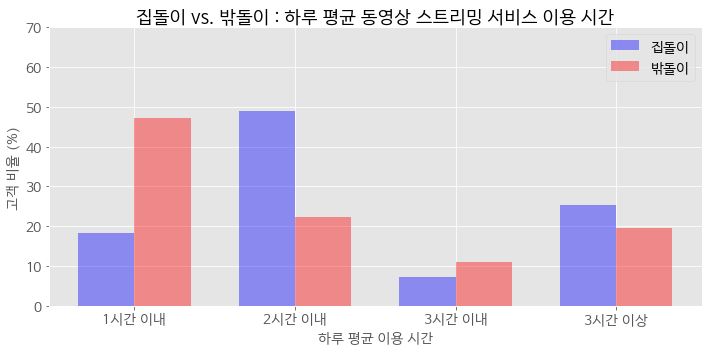

In [31]:
n_groups = 4

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, count_zip21[1:]/sum(count_zip21[1:])*100, bar_width, 
                alpha=opacity, color='b', 
                error_kw=error_config, 
                label='집돌이')

rects2 = ax.bar(index + bar_width, count_nozip21[1:]/sum(count_nozip21[1:])*100, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='밖돌이')

ax.set_xlabel('하루 평균 이용 시간', fontsize=14)
ax.set_ylabel('고객 비율 (%)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 하루 평균 동영상 스트리밍 서비스 이용 시간', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['1시간 이내', '2시간 이내', '3시간 이내', '3시간 이상'], fontsize=14)
ax.set_yticks(range(0,80,10))
ax.set_yticklabels(range(0,80,10), fontsize=14)
ax.legend(fontsize=14)

 
fig.tight_layout()
plt.show()

## 집돌이들은 언제 인터넷 동영상 스트리밍 서비스를 이용할까? 

### (설문 Q22) 유료 콘텐츠를 이용하는 경우 어느 시간대에 주로 이용하십니까?

* 집돌이

In [32]:
num, count_zip22 = np.unique(zipdol['Q22'], return_counts=True)

In [33]:
num, count_zip22

(array([1, 2, 3, 4, 5], dtype=int64), array([40,  2,  4, 36, 13], dtype=int64))

* 밖돌이

In [34]:
num, count_nozip22 = np.unique(nozipdol['Q22'], return_counts=True)

In [35]:
num, count_nozip22

(array([1, 2, 3, 4, 5], dtype=int64), array([35,  1,  4, 27,  4], dtype=int64))

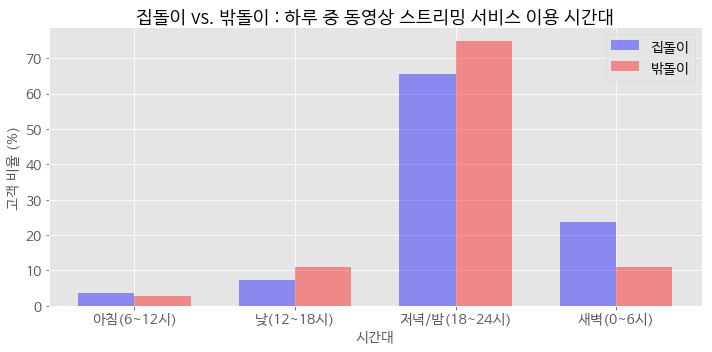

In [37]:
n_groups = 4

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, count_zip22[1:]/sum(count_zip22[1:])*100, bar_width, 
                alpha=opacity, color='b', 
                error_kw=error_config, 
                label='집돌이')

rects2 = ax.bar(index + bar_width, count_nozip22[1:]/sum(count_nozip22[1:])*100, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='밖돌이')

ax.set_xlabel('시간대', fontsize=14)
ax.set_ylabel('고객 비율 (%)', fontsize=14)
ax.set_title('집돌이 vs. 밖돌이 : 하루 중 동영상 스트리밍 서비스 이용 시간대', fontsize=18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['아침(6~12시)', '낮(12~18시)', '저녁/밤(18~24시)', '새벽(0~6시)'], fontsize=14)
ax.set_yticks(range(0,80,10))
ax.set_yticklabels(range(0,80,10), fontsize=14)
ax.legend(fontsize=14)

 
fig.tight_layout()
plt.show()

## 집돌이들은 왜 인터넷 동영상 스트리밍 서비스를 이용할까? 

### (설문 Q23) 인터넷 동영상 스트리밍 서비스를 이용하는 이유는 무엇입니까?

* 집돌이

In [65]:
zipdol

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol
4,Z2924230251ST,F,3,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,10,2
21,Z1634265931ST,F,3,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
25,Z0544232431ST,F,4,2,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,8,2
34,Z8724220501ST,F,1,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
49,Z8724252841ST,F,3,3,1,1,1,1,1,NaN,2.0,NaN,NaN,NaN,1,1,8,2
52,Z4644216191ST,F,1,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
64,Z7534255631ST,F,1,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,9,2
78,Z6034231001ST,F,1,5,1,1,1,1,1,NaN,NaN,3.0,NaN,NaN,1,1,8,2
86,Z2414219621ST,F,3,1,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,8,2
99,Z1634246641ST,F,2,3,1,1,1,1,2,1.0,NaN,NaN,NaN,NaN,1,1,8,2


In [51]:
type(zipdol['Q23'])

pandas.core.series.Series

In [62]:
zipdol['Q23'].loc[25]

'1'

In [55]:
type(zipdol['Q23'].loc[368])

int

In [53]:
num, count_zip23 = np.unique(zipdol['Q23'], return_counts=True)

TypeError: '<' not supported between instances of 'str' and 'int'

In [39]:
num, count_zip23

(array(['1', '2', '3', '4', '5(영화 및 미드감상)'], dtype=object),
 array([40,  2, 44,  8,  1], dtype=int64))

In [54]:
zipdol[zipdol['Q23']=='5(영화 및 미드감상)']

,CLNN,SEX_CCD,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q26,Q27,Q17,zipdol


In [43]:
num, count_zip23 = np.unique(zipdol['Q23'], return_counts=True)

TypeError: '<' not supported between instances of 'str' and 'int'

In [39]:
num, count_zip23

(array(['1', '2', '3', '4', '5(영화 및 미드감상)'], dtype=object),
 array([40,  2, 44,  8,  1], dtype=int64))

* 밖돌이

In [40]:
num, count_nozip23 = np.unique(nozipdol['Q23'], return_counts=True)

In [41]:
num, count_nozip23

(array(['1', '2', '3', '4'], dtype=object),
 array([35,  4, 25,  7], dtype=int64))